# Introductıon

<h2>Sequence Models</h2>

- Models that depends on time.
- Speech Recognition, NLP, Musig Generation etc.

# Recurrent Neural Network

- RNN's are able to remember important things about the input they received, which enables them to be very precise in predicting what's coming next
- This is the reason why they are the preferred algorithm for sequential data like time series, speech text, financial data, audio, video, weather and much more because they can form a much deepere understanding of a sesquence and it's context, compared to other algorithms.
- Not only feeds output but also gives feedbacks into itself.
- RNN has internal memory.
- Short term memory remembers what has happened at last node.
- temporal loop

- 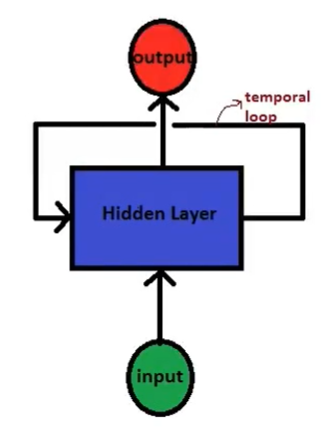
- 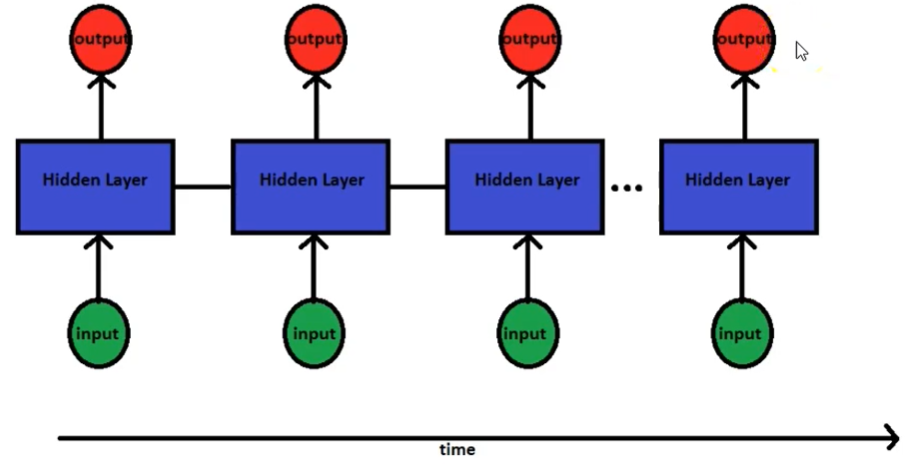

<h3>RNN Models</h3>

- One to Many (One input, more than one output)
- Many to One (More than one input, one output)
- Many to Many (More than one input, more than one output(Google Translate))

<h3>***KEY***</h3>

- RNN has short term memory but LSTM may have long term also.
- Memory is the key of RNN unlike ANN and CNN.
- Exploiding Gradients: Unnecessarly large gradiendt. Causes unnecessary weights become important.
- Vanishing Gradients: Too small gradient. Causes slow learning process.

<h2>Dataset</h2>

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import train dataset
dataset_train=pd.read_csv("Stock_Price_Train.csv")

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train=dataset_train.loc[:,["Open"]].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

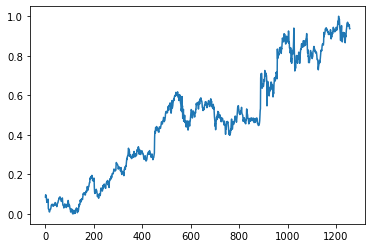

In [6]:
plt.plot(train_scaled)
plt.show()

In [7]:
#Creating a data structure with 50 timesteps and 1 outpu
x_train=[]
y_train=[]
timesteps=50
for i in range(timesteps,1250):
    x_train.append(train_scaled[i-timesteps:i,0])
    y_train.append(train_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [8]:
#Reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.94114145],
        [0.95762334],
        [0.96413424]],

       [[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95762334],
        [0.96413424],
        [0.96402262]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.96413424],
        [0.96402262],
        [0.96971501]]])

In [9]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.96402262, 0.96971501,
       0.95077759])

<h2>Creating Recurrent Neural Network Model</h2>

In [10]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#initializing
regressor=Sequential()

#adding first RNN Layer and Dropout regulariastion
regressor.add(SimpleRNN(units=256, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#adding second RNN Layer and Dropout regularisation
regressor.add(SimpleRNN(units=256,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

#adding third RNN Layer and Dropout regularisation
regressor.add(SimpleRNN(units=123,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))

##adding fourth RNN Layer and Dropout regularisation
regressor.add(SimpleRNN(units=123,activation='softmax',return_sequences=True))
regressor.add(Dropout(0.2))

#adding fifth RNN Layer and Dropout regularisation
regressor.add(SimpleRNN(units=56))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units=1))

#Compiling the RNN
regressor.compile(optimizer='Adam',loss='mean_squared_error')

#Fitting
regressor.fit(x_train,y_train,epochs=150,batch_size=64)

Epoch 1/150
19/19 [==============================] - 2s 122ms/step - loss: 0.0957
Epoch 2/150
19/19 [==============================] - 2s 125ms/step - loss: 0.0236
Epoch 3/150
19/19 [==============================] - 2s 127ms/step - loss: 0.0106
Epoch 4/150
19/19 [==============================] - 2s 124ms/step - loss: 0.0096
Epoch 5/150
19/19 [==============================] - 3s 136ms/step - loss: 0.0099
Epoch 6/150
19/19 [==============================] - 3s 145ms/step - loss: 0.0094
Epoch 7/150
19/19 [==============================] - 3s 141ms/step - loss: 0.0089
Epoch 8/150
19/19 [==============================] - 3s 142ms/step - loss: 0.0079
Epoch 9/150
19/19 [==============================] - 3s 161ms/step - loss: 0.0071
Epoch 10/150
19/19 [==============================] - 3s 136ms/step - loss: 0.0067
Epoch 11/150
19/19 [==============================] - 3s 140ms/step - loss: 0.0068
Epoch 12/150
19/19 [==============================] - 3s 133ms/step - loss: 0.0079
Epoch 13/150


<h2>Prediction and Visualization</h2>

In [11]:
#real stock price
dataset_test=pd.read_csv('Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [12]:
real_stock_price=dataset_test.loc[:, ['Open']].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [13]:
#predicted stock pricce
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-timesteps:].values.reshape(-1,1)
inputs=scaler.transform(inputs)
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

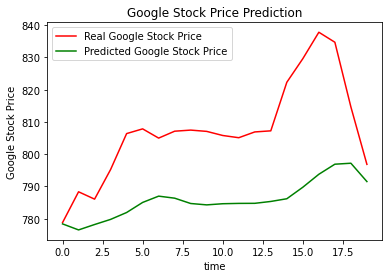

In [14]:
x_test=[]
for i in range(timesteps,70):
    x_test.append(inputs[i-timesteps:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

#Visualising
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='green',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Long Short Term Memory

- LSTM is a variant of RNN.
- LSTM has long term memory.
- LSTM architecture:
    - x: scaling information
    - +: adding information
    - sigmoid layer: to remember from sigmoid memory.
    - tanh vanishing gradient: to solve slow learning-too small gradient problems
    - h(t-1): output of LSTM unit
    - c(t-1): memory from previous LSTM unit
    - x(t): input
    - c(t): new updated memory
    - from c(t-1) to c(t) is memory pipeline or only memory
    - h(t-1) and x(t) does not collide. Think of as it is two parallel vectors.
    - arrows are vector
    
- 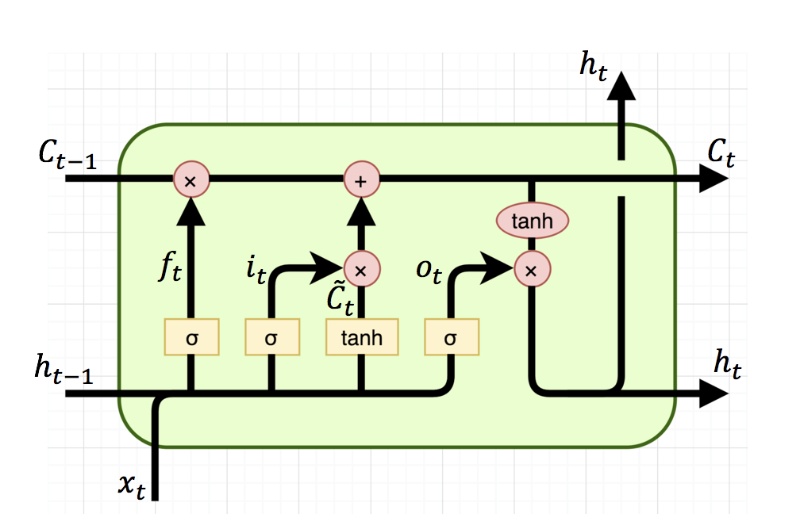

    - ft=forget gate: takes x(t) and h(t-1) as input. Decides which data should be forget.
    - it=input gate: decides which data should store.
    - ot=output gate: decides which data should be output.

<h2>Implementing LSTM</h2>

<h3>Loading and Visualizing Data</h3>

In [18]:
#libraries
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [19]:
data=pd.read_csv('international-airline-passengers.csv',skipfooter=5)
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


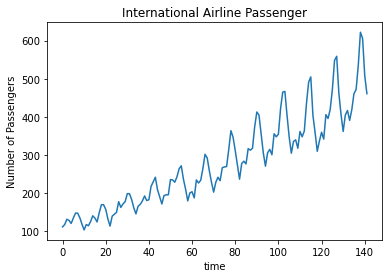

In [20]:
dataset=data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('Number of Passengers')
plt.title("International Airline Passenger")
plt.show()

<h3>Preprocessing Data</h3>

In [21]:
#reshapeing
dataset=dataset.reshape(-1,1)
dataset=dataset.astype('float32')
dataset.shape

(142, 1)

In [22]:
#scaling
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [23]:
train_size=int(len(dataset)*0.50)
test_size=len(dataset)-train_size
train=dataset[0:train_size,:]
test=dataset[train_size:len(dataset),:]
print("train size : {}, test size: {}".format(len(train),len(test)))

train size : 71, test size: 71


In [24]:
time_stemp=10
datax=[]
datay=[]
for i in range(len(train)-time_stemp-1):
    a=train[i:(i+time_stemp),0]
    datax.append(a)
    datay.append(train[i+time_stemp,0])
trainx=np.array(datax)
trainy=np.array(datay)

In [25]:
datax=[]
datay=[]
for i in range(len(test)-time_stemp-1):
    a=test[i:(i+time_stemp),0]
    datax.append(a)
    datay.append(train[i+time_stemp,0])
testx=np.array(datax)
testy=np.array(datay)

In [26]:
trainx=np.reshape(trainx,(trainx.shape[0],1,trainx.shape[1]))
testx=np.reshape(testx,(testx.shape[0],1,testx.shape[1]))

<h3>Creating LSTM Model</h3>

In [28]:
model=Sequential()
model.add(LSTM(10,input_shape=(1,time_stemp)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainx,trainy,epochs=50,batch_size=1)

Epoch 1/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0144
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 8/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 9/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 10/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 11/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 12/50
60/60 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 13/50
60/60 [==============================

<h2>Prediction and Visualization</h2>

In [29]:
trainPredict=model.predict(trainx)
testPredict=model.predict(testx)

#invert preedictions
trainPredict=scaler.inverse_transform(trainPredict)
trainy=scaler.inverse_transform([trainy])
testPredict=scaler.inverse_transform(testPredict)
testy=scaler.inverse_transform([testy])

#calculate root mean squared error
trainScore=math.sqrt(mean_squared_error(trainy[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE'%(trainScore))
testScore=math.sqrt(mean_squared_error(testy[0],testPredict[:,0]))
print('Test Score: %.2f RMSE'%(testScore))

Train Score: 18.18 RMSE
Test Score: 172.05 RMSE


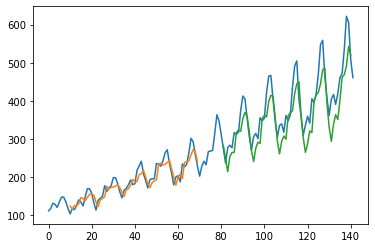

In [33]:
#shifting train
trainPredictPlot=np.empty_like(dataset)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp,:]=trainPredict
#shifting test predictions for plotting
testPredictPlot=np.empty_like(dataset)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1,:]=testPredict

#plot
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()